In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import sys
import pandas as pd

import pickle
import glob
import re
import yaml
import torch
import json

In [51]:
path = "/private/home/yuandong/dl_theory2/outputs/2019-09-17_10-45-25"
path = "/private/home/yuandong/dl_theory2/outputs/2019-09-17_10-58-16"

# two_layer_new2.py seed=6 multi=2 d=100 m=5 teacher_strength_decay=1 lr=0.01 use_sgd=true N_train=1000 num_epoch=40 num_iter_per_epoch=100 batchsize=16
# Now we save evaluation before any training happens. 
path = "/private/home/yuandong/dl_theory2/outputs/2019-09-22/15-18-14"

# two_layer_new2.py multi=2 d=100 m=5 teacher_strength_decay=1 lr=0.01 use_sgd=true N_train=1000 num_epoch=40 num_iter_per_epoch=100 batchsize=16
path = "/private/home/yuandong/dl_theory2/outputs/2019-09-29/10-01-29"

args = yaml.load(open(os.path.join(path, "config.yaml"), "r"))
data = [torch.load(os.path.join(path, "stats.pickle"))]

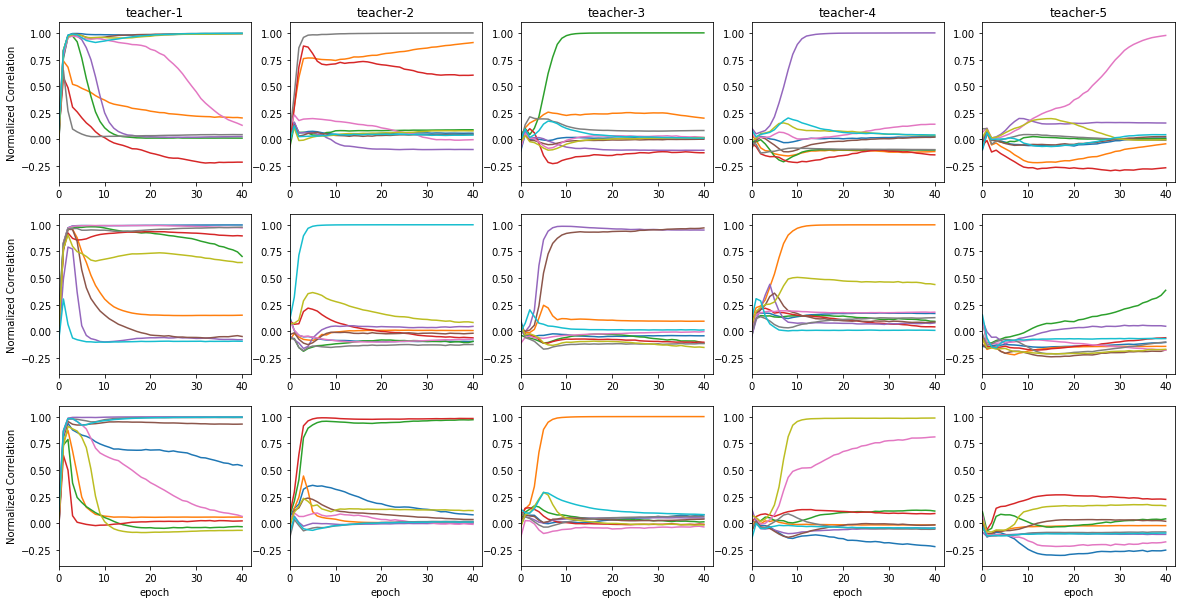

In [67]:
fig = plt.figure(figsize=(20, 10))

d = data[0][6]

num_iter = len(d)
num_teacher, num_student = d[1]["corr_eval"].size()

seeds = (6, 1, 3)
counter = 1

for k, seed in enumerate(seeds):
    d = data[0][seed]
    for i in range(num_teacher):
        ax = plt.subplot(len(seeds), num_teacher, counter)
        counter += 1
        
        corrs = torch.DoubleTensor(num_iter, num_student)
        for it in range(num_iter):
            corrs[it, :] = d[it]["corr_eval"][i, :]

        for j in range(num_student):
            p = plt.plot(corrs[:, j].numpy(), label=f"s{j}")
            # plt.text(num_iter - 1, corrs[-1, j], f"{j}", color=p[0].get_color(), backgroundcolor="white")
        # plt.legend()
        if k == 0:
            plt.title(f"teacher-{i+1}")
        if k == len(seeds) - 1:
            plt.xlabel("epoch")
            
        plt.axis([0, num_iter+1, -0.4, 1.1])

        if i == 0:
            plt.ylabel("Normalized Correlation")
        
plt.savefig(f"student-converge-m{num_teacher}-n{num_student}-decay{args['teacher_strength_decay']}.pdf")


In [42]:
args['teacher_strength_decay']

1